Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:

1. Customer ID -  Unique ID for each customer
2. Gender -Customer sex  
3. Age - Customer age
4. Annual Income - The total amount of money earned
5. Spending Score - Score assigned by the shop, based on customer behavior and spending nature
6. Profession - Occupation
7. Work Experience - in years
8. Family Size - Customer family size

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization styles
sns.set(style="whitegrid")

# Loading the dataset
file_path = 'Customers.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [12]:
df['Gender_Code'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Code
0,1,Male,19,15000,39,Healthcare,1,4,1
1,2,Male,21,35000,81,Engineer,3,3,1
2,3,Female,20,86000,6,Engineer,1,1,0
3,4,Female,23,59000,77,Lawyer,0,2,0
4,5,Female,31,38000,40,Entertainment,2,6,0


Data Splitting
To assess the effectiveness of the predictive model, the dataset is divided into training and testing subsets. The training set is used to build and tune the model, whereas the testing set serves to evaluate its predictive performance. This split helps in validating the accuracy and robustness of the model against new, unseen data.

In [13]:
# Define the features and the target
X = df.drop(['CustomerID', 'Spending Score (1-100)','Gender','Profession'], axis=1)
y = df['Spending Score (1-100)']




In [26]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Making Predictions and Evaluating the Model
Predicting House Values
After training, the model is used to predict house values for the test dataset. This step is crucial as it provides an estimation of how the model will perform in real-world scenarios or when exposed to new data not seen during the training phase.

Model Evaluation Metrics
To assess the accuracy of the predictions, two key metrics are calculated:

Mean Squared Error (MSE): This metric represents the average squared difference between the actual and predicted house values. It offers a measure of the model's prediction error, with lower values indicating better accuracy.
Coefficient of Determination (R² Score): This statistic provides an indication of the goodness of fit of the model. It is a scale-free score that measures how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. An R² score of 1 indicates perfect prediction, while a score closer to 0 suggests the model fails to accurately model the target variable.
Visualization of Predictions
Visual representation of the actual vs. predicted values is created using a scatter plot, which helps in visually assessing the performance of the regression model. Points along the diagonal line represent accurate predictions, while deviations from this line indicate discrepancies between the actual and predicted values.

Scatter Plot: Displays actual values against predicted values, providing a visual assessment of how well the predictions match the true values.
Line of Perfect Prediction: A reference line (colored red in the plot) is drawn where the actual values equal the predicted values, serving as a benchmark for perfect prediction.
This visual analysis, alongside the quantitative metrics, offers a comprehensive overview of the model's performance, highlighting areas where the model excels or where improvements are needed.

**Model Initialization and Training**

**Model Initialization**

A Linear Regression model is initialized to predict the spending score values based on various input features. This model assumes a linear relationship between the target variable and the predictors.

Model Training
Once initialized, the model is trained using the designated training dataset. This process involves adjusting the model parameters to minimize the error between the predicted and actual spending score in the training data, thereby optimizing the model’s ability to make accurate predictions.

In [27]:

model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

Mean Squared Error: 778.69
R^2 Score: -0.01


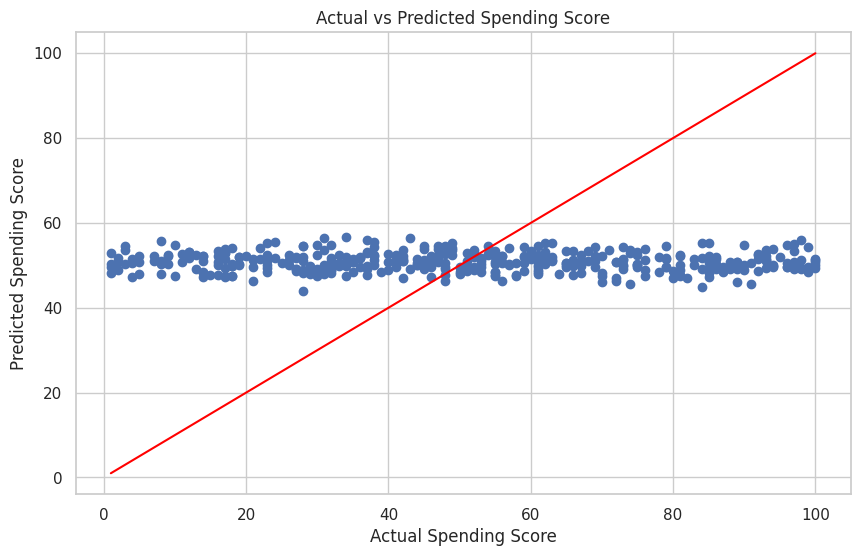

In [28]:
# Make predictions
y_pred = model.predict(x_test)

# Calculate the mean squared error and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line showing perfect predictions
plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.title('Actual vs Predicted Spending Score')
plt.show()

In [10]:
# Display the coefficients of the linear model
feature_importance = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)


                   Coefficient
Annual Income ($)     0.000022
Work Experience      -0.352104


In [11]:
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: 49.9790527226482




Completed Equation:
 =(0.000370)CustomerID+ (0.000022)Annual Income ($) - (0.054049)Age − (0.2119230)Family Size -(0.365969)Work Experience



**Initial Data Exploration**.

We will conduct an initial exploration of the dataset to understand its structure and basic characteristics.
We will:

1)Check the shape of the dataset.

2)Display the data types of each column.

3)Get a summary of the dataset using descriptive statistics.

In [ ]:
# Checking the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Displaying the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Getting a summary of the dataset using descriptive statistics
print("\nSummary of the dataset:")
print(df.describe().T)


The dataset contains 2000 rows and 8 columns.

Data types of each column:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

Summary of the dataset:
                         count         mean           std  min       25%  \
CustomerID              2000.0    1000.5000    577.494589  1.0    500.75   
Age                     2000.0      48.9600     28.429747  0.0     25.00   
Annual Income ($)       2000.0  110731.8215  45739.536688  0.0  74572.00   
Spending Score (1-100)  2000.0      50.9625     27.934661  0.0     28.00   
Work Experience         2000.0       4.1025      3.922204  0.0      1.00   
Family Size             2000.0       3.7685      1.970749  1.0      2.00   

                             50%        75%       max  
CustomerID                1000.5  

**Findings**

   **Dataset Overview:**

1)The dataset contains 2000 rows and 8 columns.

2)Features include both numerical (e.g., Age, Annual Income) and categorical (e.g.,Gender,Profession) variables.

**Key Insights:**

1)Annual Income ($): The Mean annual income is 110731 while the max 189974.

2)Missing Values:No missing values in Age and max value for age is 99.

3)Spending Score (1-100): As a mean of 50 and max score of 100.

##Identifying Categorical and Numerical Variables




In [ ]:
# Identifying categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)


Categorical Variables: ['Gender', 'Profession']
Numerical Variables: ['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']


### Univariate Analysis for Numerical Variables

#### **Histograms**

In [ ]:
numerical_vars

['CustomerID',
 'Age',
 'Annual Income ($)',
 'Spending Score (1-100)',
 'Work Experience',
 'Family Size']

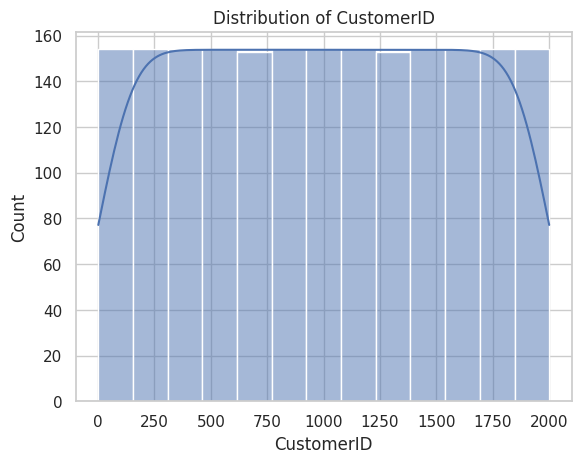

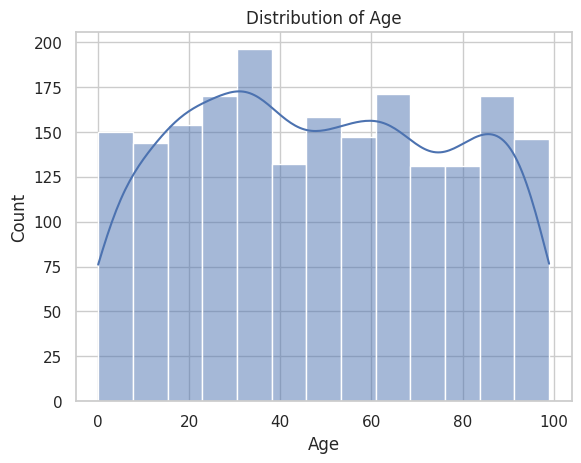

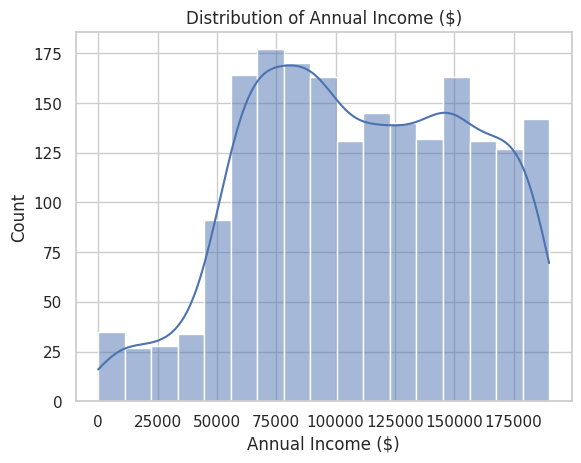

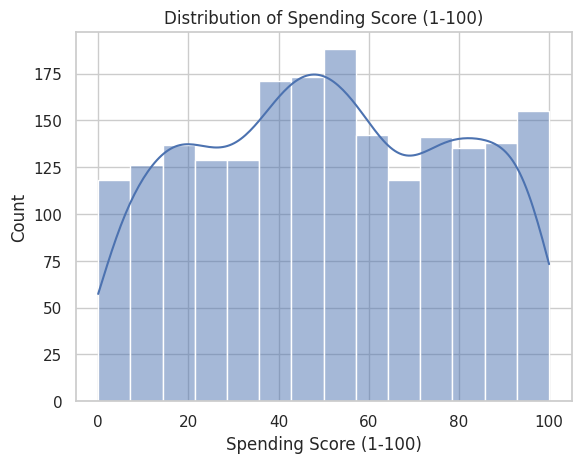

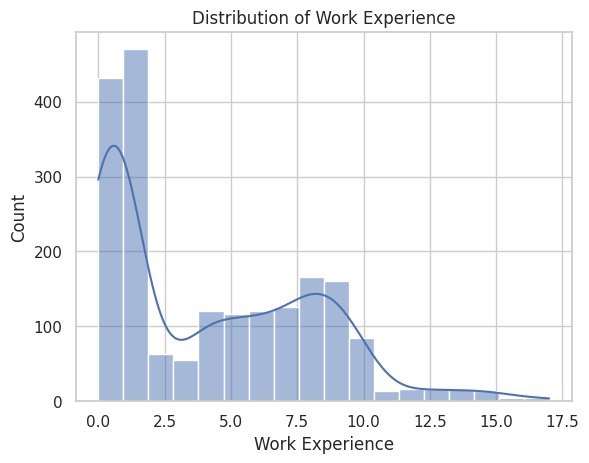

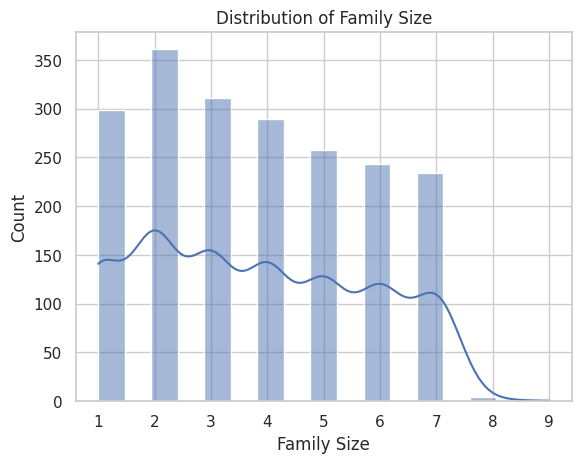

In [ ]:
# Univariate analysis for numerical variables
for var in numerical_vars:
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')

   #print(df['Age'].value_counts().sort_index())
    plt.show()

**Histogram Findings**

Numerical Variables:


1 **CustomerID**:




Uniform distribution across all IDs.
This variable serves as a unique identifier and does not provide analytical value. Recommendation: Drop CustomerId

2   **Age**




*   Age range  30 are high next to 20 and 90.
*   No number of missing values (2000).


3   **Annaul Income:**

       1. Many customers received annual income of 75000 to 100000
       2. less customers 25000 annual income.

4  **Spending Score (1-100):**

       1.Majority of the customer have spending score of 40 -60.
       

5 **Work Experence:**

       1.customers without work experence are higher.
       2.customers with 11 to 17 years are more.

6 **Family size:**
  
        customers with 2 family size are higher  while customers with 8 are the lowest.








**Dropping Unnecessary Columns**

- **CustomerId**: Unique identifier for each Customer.

In [ ]:
# Dropping unnecessary columns
columns_to_drop = ['CustomerID','Work Experience']
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows to confirm changes
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Family Size
0,Male,19,15000,39,Healthcare,4
1,Male,21,35000,81,Engineer,3
2,Female,20,86000,6,Engineer,1
3,Female,23,59000,77,Lawyer,2
4,Female,31,38000,40,Entertainment,6


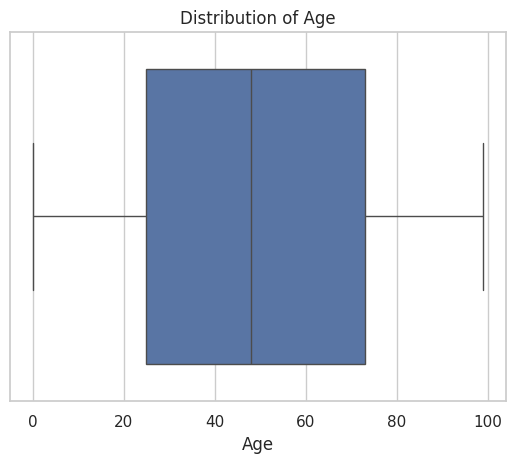

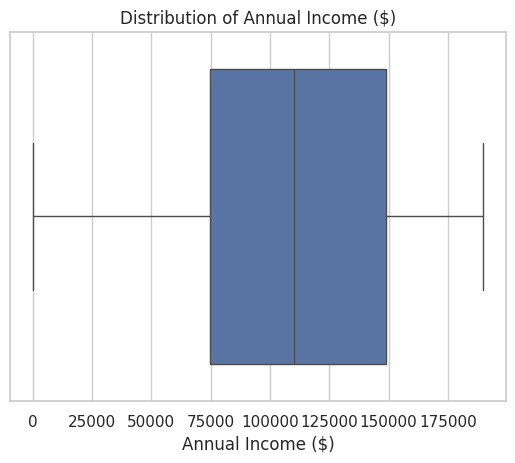

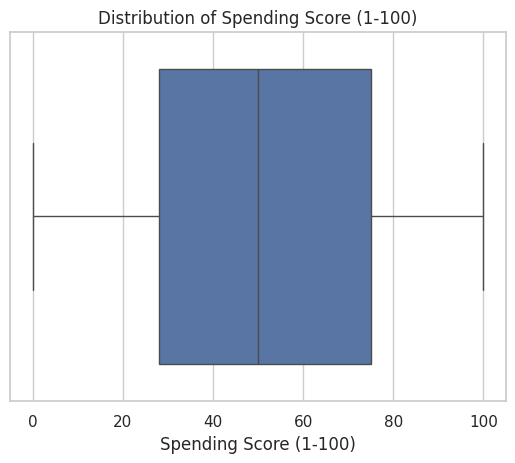

In [ ]:

numerical_vars.remove("CustomerID")



for var in ['Age', 'Annual Income ($)','Spending Score (1-100)']:
    sns.boxplot(x=df[var].dropna())
    plt.title(f'Distribution of {var}')
    plt.show()

**Box Plot Findings**

**Age**

1)The dstributon of the age of the people are around 0 - 99.

2)while the average is around 50.






**Univariate Analysis of categorical variable**

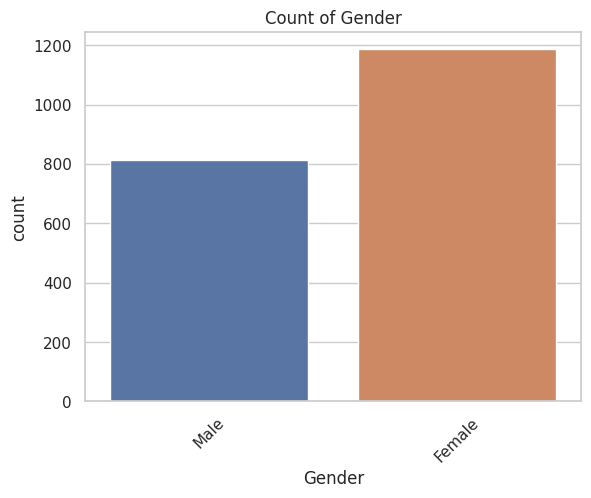

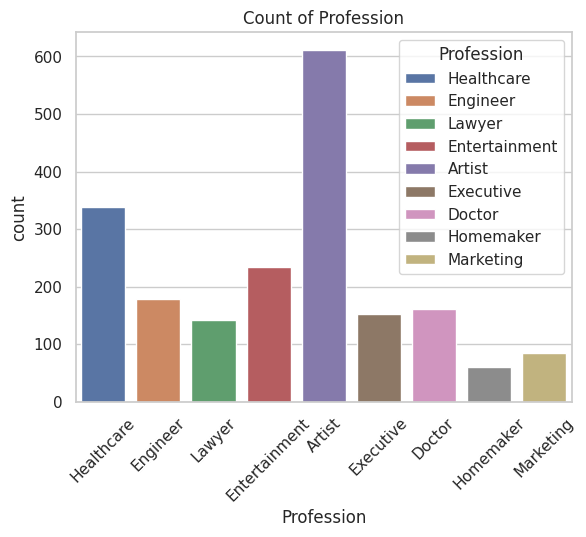

In [ ]:
# The categorical variable excluding the dropped ones
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Univariate analysis for categorical variables
for var in categorical_vars:
    sns.countplot(x=var, data=df,hue=var)
    plt.title(f'Count of {var}')
    plt.xticks(rotation=45)
    plt.show()

**Insights from Univariate Analysis of Categorical Variables**

**Sex**

  **Distribution**:
    
    1.The majority of customers were female (approximately more than 100%).

    2.Males made up a smaller proportion of the customers (approximately 80%).

  


### Next Steps:
1. **Handle Missing Values**:
   - No missng values.
**2 .Bivariate Analysis**

### Relationship between Scatter plot for numerical vs numerical variables

<ipython-input-17-923916218>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Profession', loc='upper right')


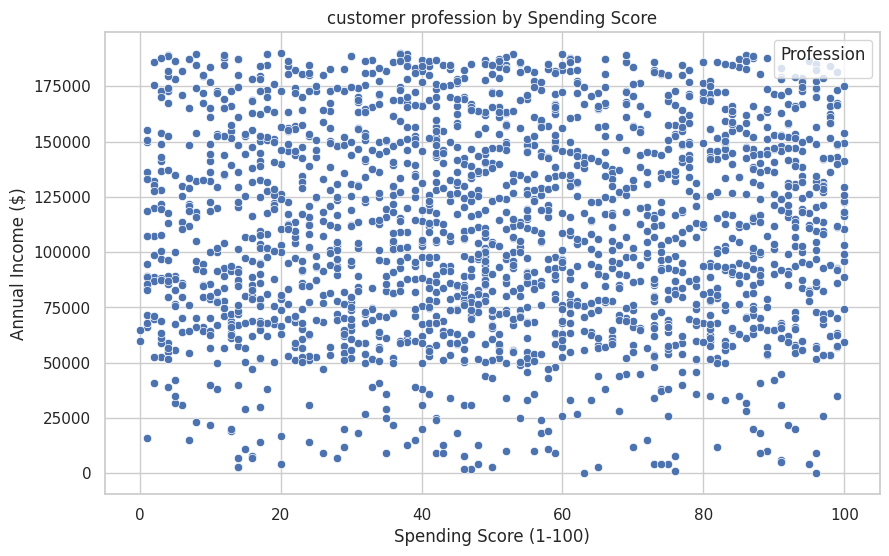

In [ ]:
# Bivariate analysis: customer annual income by by spendng score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income ($)', data=df)
plt.title('Annual Income by Spending Score')
plt.legend(title='Annual Income', loc='upper right')
plt.show()

**Observation**

**Distribution of annual income**.

1) People with 0-50000 annual income are few while people above 50000.

**Spendng score.**

2)Evenly diistributed.

**Relationship between Categorical Variables and Numerical Variables**

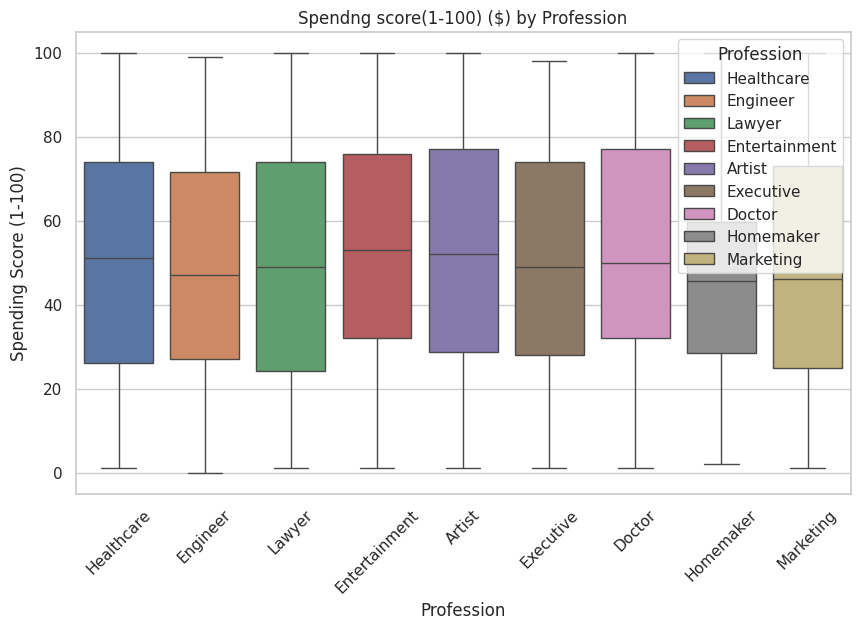

In [ ]:
# Bivariate analysis: Spendng score(1-100)) by Professon
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profession', y='Spending Score (1-100)', data=df,hue=var )
plt.title('Spendng score(1-100) ($) by Profession')
plt.xticks(rotation=45)
plt.show()

**Relationship between Categorical Variables and Numerical Variables**

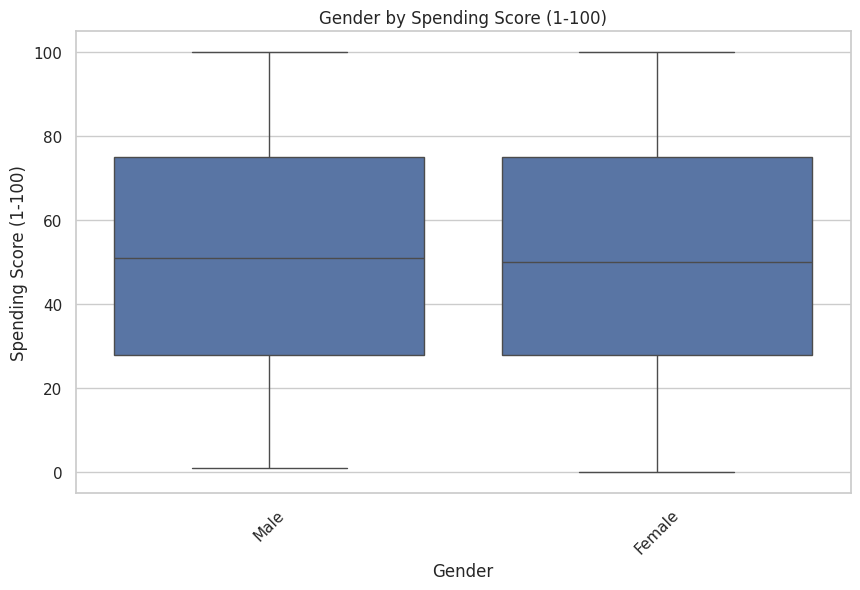

In [ ]:
# Bivariate analysis: Spendng score(1-100)) by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Gender by Spending Score (1-100)')
plt.xticks(rotation=45)
plt.show()

**Relationship between Numerical Variable and Numerical Variables**

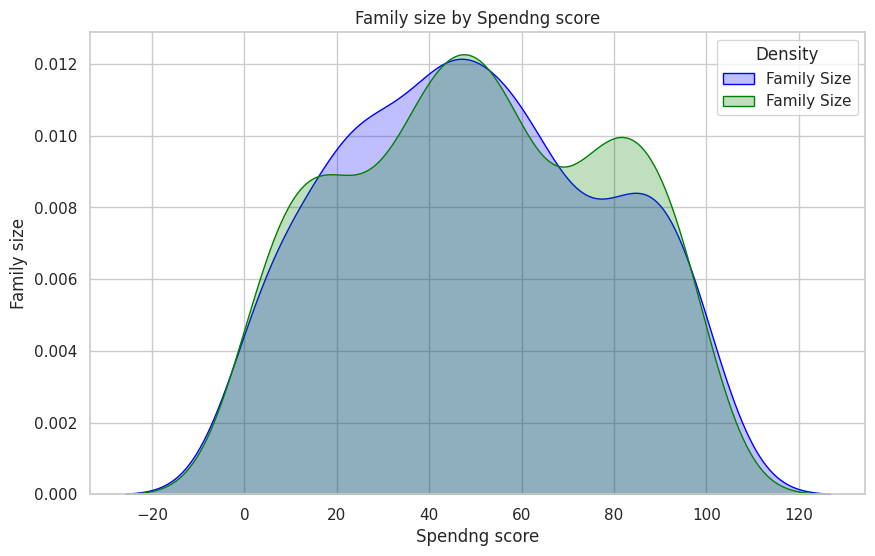

In [ ]:
# Bivariate analysis: Family size by Spending Score
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Family Size'] == 1]['Spending Score (1-100)'], fill=True, label='Family Size', color='blue')
sns.kdeplot(df[df['Family Size'] == 2]['Spending Score (1-100)'], fill=True, label='Family Size', color='green')
plt.title('Family size by Spendng score')
plt.xlabel('Spendng score')
plt.ylabel('Family size')
plt.legend(title='Density')
plt.show()

**Multivariate Analysis**

Pairplot for visualizing relationships between Categorical variables

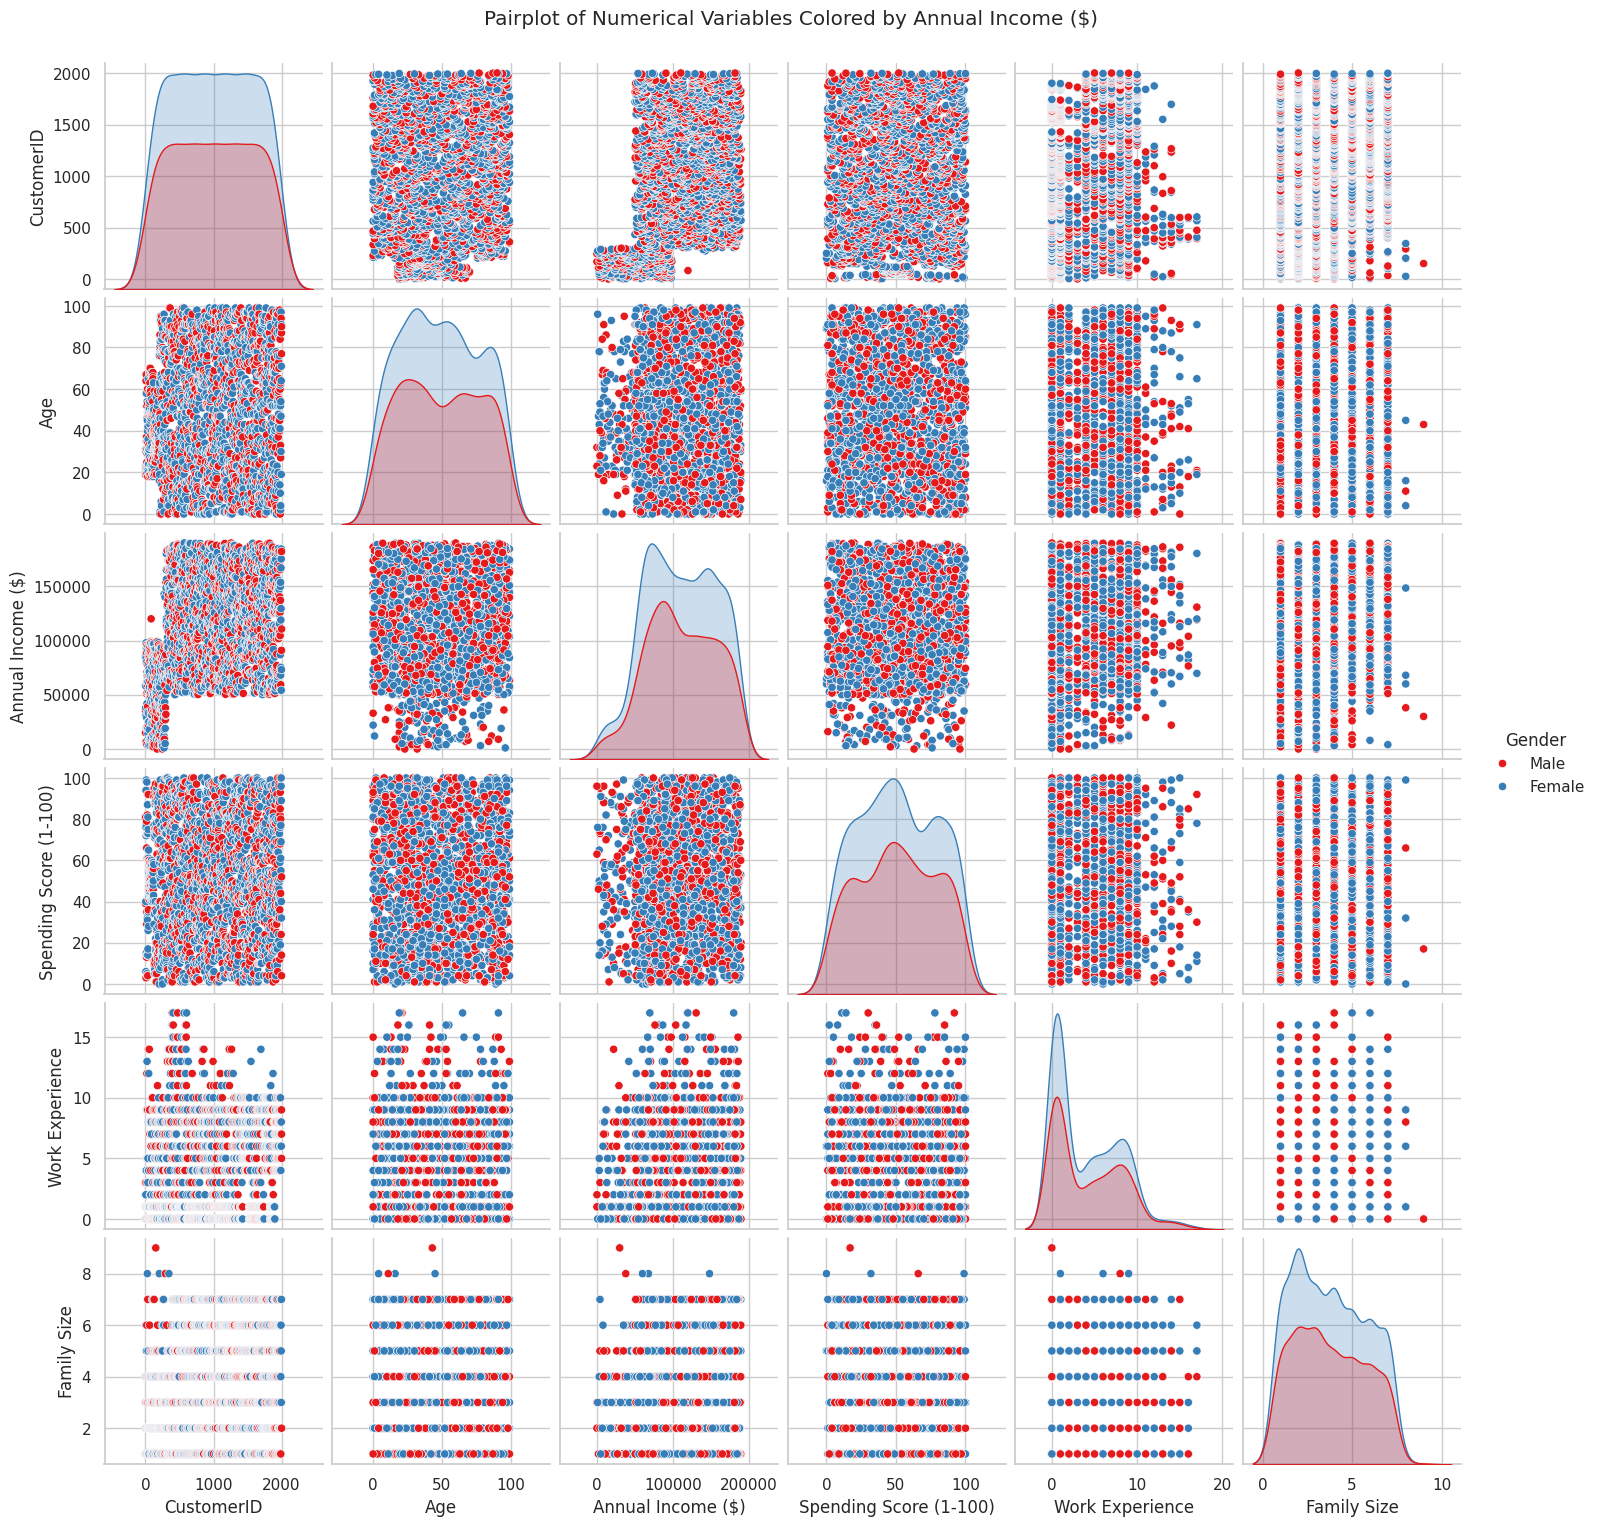

In [ ]:
sns.pairplot(df, hue='Gender', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables Colored by Annual Income ($)', y=1.02)
plt.show()

 **Heatmap for showing correlation matrix of numerical variables**

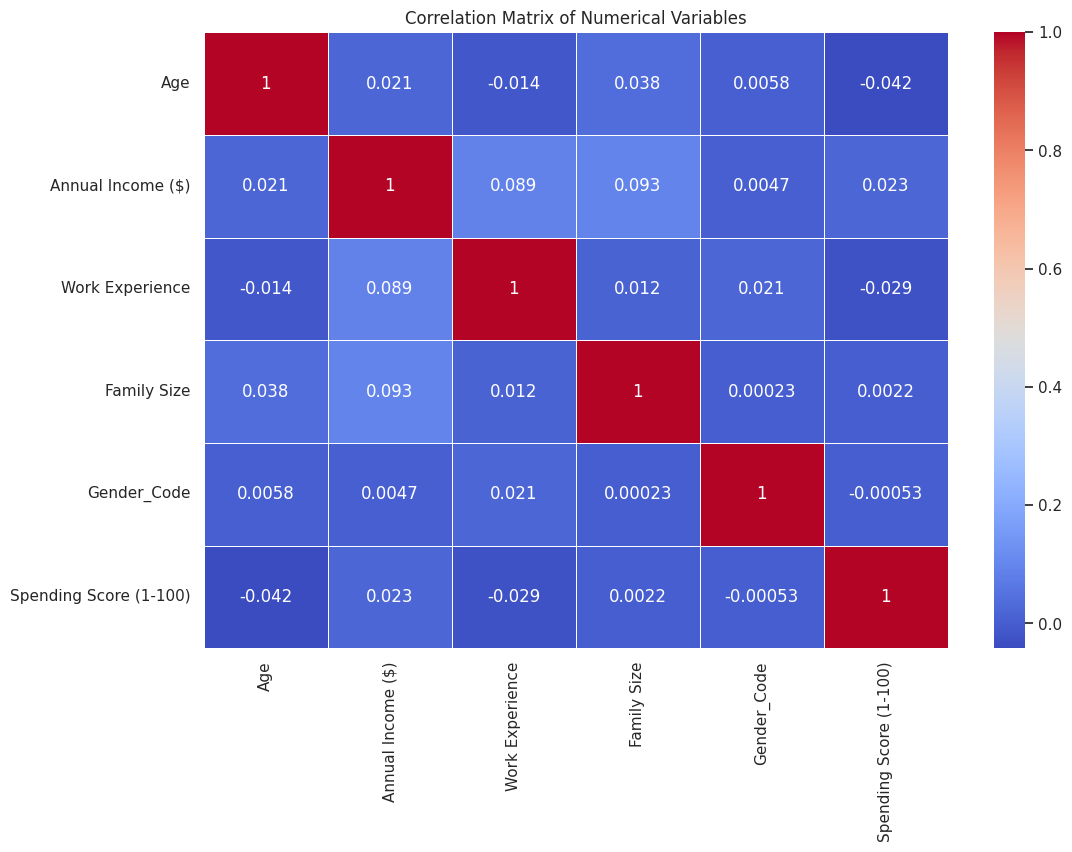

In [29]:
plt.figure(figsize=(12, 8))
numerical_vars = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'Gender_Code', 'Spending Score (1-100)']
numerical_df = df[numerical_vars]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Correlatation**


1)The spending score is a bit negatively correlated to age which means if age goes up spend score goes down a bit and if age goes down spending score goes up a bit.

2)The annual income is a bit postively correlated with age, which means if annual icme goes up ,age will also goes up and if annaul income goes down age goes down.    

 **Multivariate Boxplots for Age,profession and Gender**

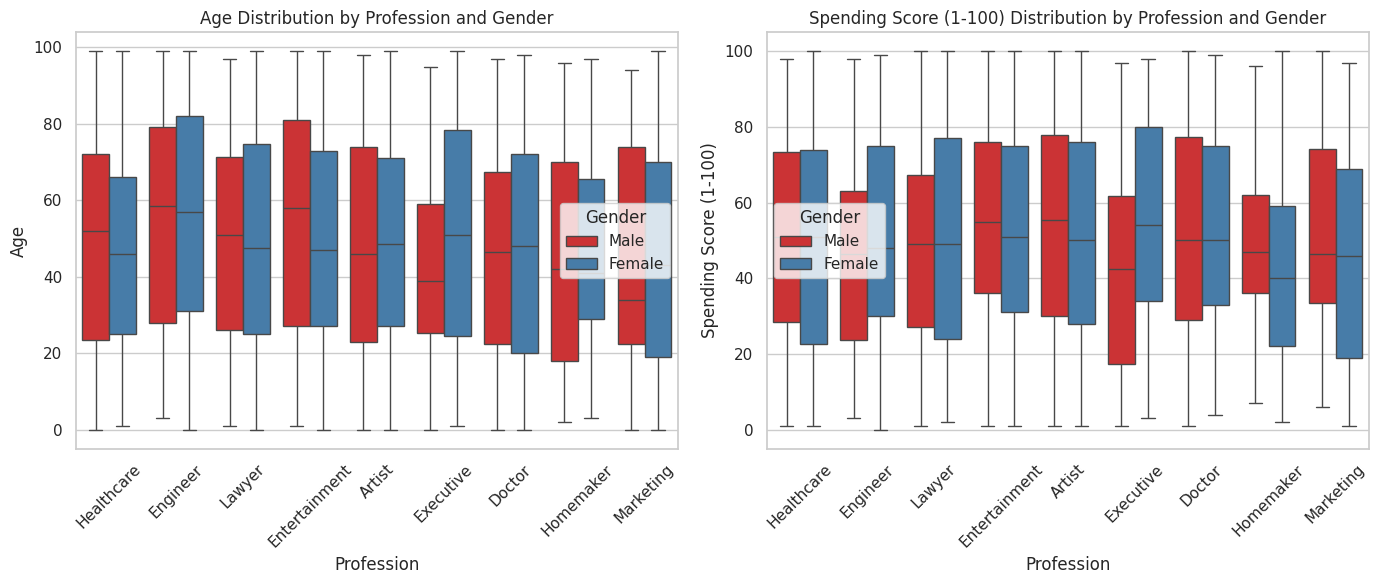

In [ ]:
plt.figure(figsize=(14, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x='Profession', y='Age', hue='Gender', data=df, palette='Set1')
plt.title('Age Distribution by Profession and Gender')
plt.xlabel('Profession')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.boxplot(x='Profession', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set1')
plt.title('Spending Score (1-100) Distribution by Profession and Gender')
plt.xlabel('Profession')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




 **Automated Exploratory Data Analysis (EDA)**


                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

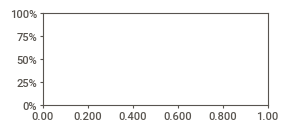

In [ ]:
!pip install sweetviz
import sweetviz as sv

report = sv.analyze(df)
report.show_html("sweetviz_report.html")


In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("pandas_profiling_report.html")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e7ef4eff5b32347b3540c4e48854a4f6781656bbac5c7dfaa5bd092d35564a86
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 33.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]